<a href="https://colab.research.google.com/github/4hmetcakmak/PythonDataScienceHandbook/blob/master/12_04calsswork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import fetch_20newsgroups 

data = fetch_20newsgroups() 
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
categories=["rec.autos", "sci.med","misc.forsale","rec.motorcycles","sci.crypt"]
train = fetch_20newsgroups(subset='train', categories=categories) 
test = fetch_20newsgroups(subset='test', categories=categories)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline 

model = make_pipeline(CountVectorizer(), MultinomialNB())

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB 
from sklearn.pipeline import make_pipeline 

model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target) #count
labels = model.predict(test.data)

In [ ]:
model1.fit(train.data, train.target) #tfid
labels1 = model1.predict(test.data)

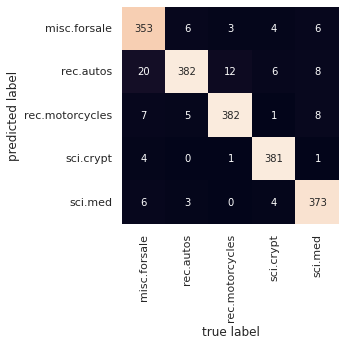

In [ ]:
from sklearn.metrics import confusion_matrix #Count
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

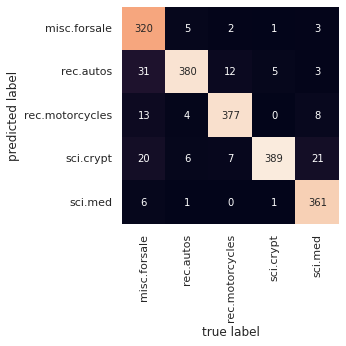

In [ ]:
from sklearn.metrics import confusion_matrix  #TF-ID 
mat1 = confusion_matrix(test.target, labels1)
sns.heatmap(mat1.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [ ]:
def predict_category(s, train=train, model=model): #count
    pred = model.predict([s]) 
    return train.target_names[pred[0]]

In [ ]:
predict_category("can ı buy a vehicle with bitcoin?") #count

'rec.autos'

In [ ]:
predict_category("can ı buy a vehicle with bitcoin?", train=train, model=model1) #TF-ID

'rec.autos'

In [ ]:
from sklearn.metrics import accuracy_score #count
print(accuracy_score(test.target, labels))

0.9468623481781376


In [ ]:
from sklearn.metrics import accuracy_score #TF-ID
print(accuracy_score(test.target, labels1))

0.9245951417004049


BELİRLEDİĞİM KATEGORİLER BAZINDA COUNT VECTORTÜ DAHA BAŞARILI SONUÇ VERDİ MULTİNOMİAL NAİVE MODELDE.